---
title: Dihedrals and Ramachandran plots
---

This notebook requires biopython and PeptideBuilder, which can be installed through pip with

```
pip install biopython PeptideBuilder
```

In [1]:
import Bio
import PeptideBuilder as PB
import itertools
import numpy as np

In [79]:
VDW_RADII = {
    "H" : 1.20,
    "C" : 1.70,
    "N" : 1.55,
    "O" : 1.52,
    "P" : 1.80,
    "S" : 1.80,
}

# returns 1 if there are clashes, 0 otherwise
def energy(structure):
    exclude_interactions = {
        "CA" : ["N",],
        "CB" : [],
        "C" : ["CA", "N", "O"],
        "O" : ["N", "CA"],
        "N" : []
    }
    
    def overlap(p, q):
        p_elem = p.name[0]
        q_elem = q.name[0]
        radius = (VDW_RADII[p_elem] + VDW_RADII[q_elem]) * 0.88 # heuristic rescaling factor used by Ramachandran et al
        return np.linalg.norm(p - q) < radius
        
    
    residues = list(structure.get_residues())
    for idx, residue in enumerate(residues[:-1]):
        next_res = residues[idx + 1]
        for p_atom in residue.get_atoms():
            for q_atom in next_res.get_atoms():
                if not q_atom.name in exclude_interactions[p_atom.name]:
                    if overlap(p_atom, q_atom):
                        print(p_atom.name, q_atom.name)
                        return 1
        
    return 0

In [80]:
geo_ends = PB.Geometry.geometry("G")
structure = PB.initialize_res(geo_ends)
PB.add_residue(structure, "G", -5, 0)
PB.add_residue(structure, geo_ends)

print(energy(structure))

for a in structure.get_atoms():
    print(a.get_full_id())

N N
1
('X', 0, 'A', (' ', 1, ' '), ('N', ' '))
('X', 0, 'A', (' ', 1, ' '), ('CA', ' '))
('X', 0, 'A', (' ', 1, ' '), ('C', ' '))
('X', 0, 'A', (' ', 1, ' '), ('O', ' '))
('X', 0, 'A', (' ', 2, ' '), ('N', ' '))
('X', 0, 'A', (' ', 2, ' '), ('CA', ' '))
('X', 0, 'A', (' ', 2, ' '), ('C', ' '))
('X', 0, 'A', (' ', 2, ' '), ('O', ' '))
('X', 0, 'A', (' ', 3, ' '), ('N', ' '))
('X', 0, 'A', (' ', 3, ' '), ('CA', ' '))
('X', 0, 'A', (' ', 3, ' '), ('C', ' '))
('X', 0, 'A', (' ', 3, ' '), ('O', ' '))


In [81]:
import matplotlib.pyplot as plt
from matplotlib import colors

# create a peptide consisting of 3 glycines, adapter from PeptideBuilder's example
phis = np.array(list(range(-180, 181, 10)))
psis = np.array(list(range(-180, 181, 10)))
forbidden_psi = []
forbidden_phi = []
energies = np.zeros((phis.shape[0], psis.shape[0]))
for i, phi in enumerate(phis):
    for j, psi in enumerate(psis):
        geo_ends = PB.Geometry.geometry("G")
        structure = PB.initialize_res(geo_ends)
        PB.add_residue(structure, "A", phi, psi)
        PB.add_residue(structure, geo_ends)
        
        E = energy(structure)
        energies[j, i] = E
        if E == 0:
            forbidden_phi.append(phi)
            forbidden_psi.append(psi)
            
np.savetxt("combs.dat", energies)

C CB
C CB
C CB
C CB
C CB
C CB
C CB
C CB
C CB
C CB
C CB
C CB
C CB
C CB
C CB
N N
N N
N N
N N
N N
N N
N N
C CB
C CB
C CB
C CB
C CB
C CB
C CB
C CB
C CB
C CB
C CB
C CB
C CB
C CB
C CB
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
N N
N N
N N
N N
N N
N N
N N
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
N N
N N
N N
N N
N N
N N
N N
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
N N
N N
N N
N N
N N
N N
N N
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C 

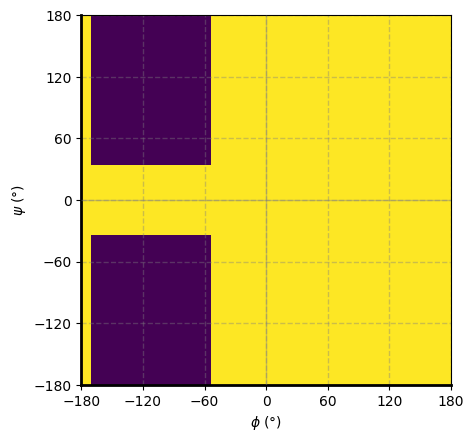

In [82]:
def format_axis(axis):
    zero_lines_kwargs = {
        "colors" : ["Grey"], 
        "alpha" : 0.4, 
        "zorder" : 3, 
        "linewidths" : [1]
        }

    axis.grid(alpha=0.4, linestyle="--", linewidth=1, color="Grey", zorder=3)
    axis.hlines(0, -180, 180, **zero_lines_kwargs)
    axis.vlines(0, -180, 180, **zero_lines_kwargs)
    
    axis.set_xlim((-180, 180))
    axis.set_ylim((-180, 180))
    axis.set_xlabel(u"$\phi$ (\u00B0)")	# phi
    axis.set_ylabel(u"$\psi$ (\u00B0)")	# psi

    axis.set_xticks([-180, -120, -60, 0, 60, 120, 180])
    axis.set_yticks([-180, -120, -60, 0, 60, 120, 180])

    ax_linewidth = 2
    axis.spines["left"].set_linewidth(ax_linewidth)
    axis.spines["bottom"].set_linewidth(ax_linewidth)
    
fig, ax = plt.subplots()
kwargs = {
    "bins" : 140, 
    "norm" : colors.PowerNorm(0.1),
    "alpha" : 1}
#ax.hist2d(forbidden_phi, forbidden_psi, **kwargs)
ax.imshow(energies, extent=(-180, 180, -180, 180))
format_axis(ax)

In [89]:
out = Bio.PDB.PDBIO()
out.set_structure(structure)
out.save("example.pdb")